#Self Organizing Map

##Install MiniSom Package

### Importing the libraries


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x)

##Training the SOM


In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15)
#initialize weights
som.random_weights_init(x)
som.train_random(x, num_iteration=100)

##Visualizing the results


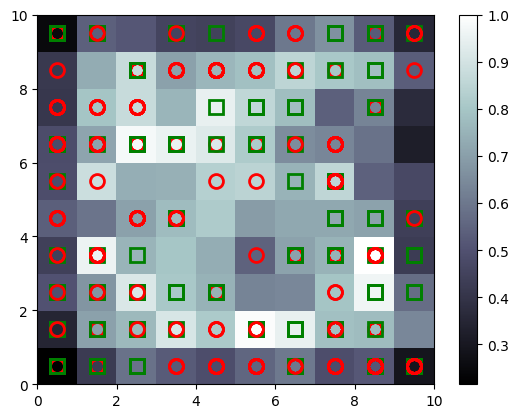

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for row, vector in enumerate(x):
  w = som.winner(vector)
  plot(w[0]+0.5, w[1]+0.5, markers[y[row]], markeredgecolor = colors[y[row]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

## Finding the frauds


In [ ]:
mappings = som.win_map(x)

frauds = np.concatenate((mappings[(8,1)], mappings[(6,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [ ]:
print("Probable Fraud Customer IDs are: ")
for id in frauds:
  print(id)

Probable Fraud Customer IDs are: 
[1.5586183e+07 1.0000000e+00 1.7080000e+01 2.5000000e-01 2.0000000e+00
 1.1000000e+01 4.0000000e+00 3.3500000e-01 0.0000000e+00 1.0000000e+00
 4.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 9.0000000e+00]
[1.5607988e+07 1.0000000e+00 3.8420000e+01 7.0500000e-01 2.0000000e+00
 8.0000000e+00 4.0000000e+00 3.7500000e-01 0.0000000e+00 1.0000000e+00
 2.0000000e+00 0.0000000e+00 2.0000000e+00 2.2500000e+02 5.0100000e+02]
[1.563201e+07 1.000000e+00 3.575000e+01 2.415000e+00 2.000000e+00
 9.000000e+00 4.000000e+00 1.250000e-01 0.000000e+00 1.000000e+00
 2.000000e+00 0.000000e+00 2.000000e+00 2.200000e+02 2.000000e+00]
[1.5627365e+07 1.0000000e+00 2.4420000e+01 2.0000000e+00 2.0000000e+00
 1.0000000e+01 2.0000000e+00 1.6500000e-01 0.0000000e+00 1.0000000e+00
 2.0000000e+00 0.0000000e+00 2.0000000e+00 3.2000000e+02 1.3010000e+03]
[1.557668e+07 1.000000e+00 2.408000e+01 8.750000e-01 2.000000e+00
 7.000000e+00 4.000000e+00 8.500000e-02 0.000000e+00 1.0000

##Printing the Fraunch Clients


In [32]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15586183
15607988
15632010
15627365
15576680
15620570
15592412
15654625
15802869
15750545
15665014


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features


In [33]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [35]:
is_fraud = np.zeros(len(dataset))
for idx in range(len(dataset)):
  cust_id = dataset.iloc[idx, 0]
  if cust_id in frauds:
    is_fraud[idx] = 1

## Part 3 ANN

### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(customers)

array([[ 0.68873723, -0.80105183,  1.34711063, ..., -0.48835847,
         0.03738039, -0.89530251],
       [-1.45193254, -0.75124044,  0.45054795, ..., -0.13959116,
        -0.19541334, -0.89530251],
       [-1.45193254, -0.16785619, -0.60482292, ...,  0.55794344,
        -0.19541334, -0.89530251],
       ...,
       [-1.45193254, -1.07543661,  0.96114643, ..., -0.48835847,
        -0.19541334,  1.11694091],
       [-1.45193254, -0.35021653,  1.95822062, ..., -0.3721027 ,
        -0.19330052,  1.11694091],
       [ 0.68873723,  0.79628971, -0.94857229, ...,  2.18552419,
        -0.19541334,  1.11694091]])

## Building the ANN

In [37]:
import tensorflow as tf

## Initializing the ANN

In [38]:
ann = tf.keras.models.Sequential()

### Add input Layer and first hidden layer

In [39]:
ann.add(tf.keras.layers.Dense(units=2, activation = 'relu'))

## Add output Layers

In [40]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compiling the ANN

In [41]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##Training the ANN on training set

In [42]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 3s 3ms/step - loss: 102.3860 - accuracy: 0.3420
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 30.3480 - accuracy: 0.7565
Epoch 3/10
690/690 [==============================] - 2s 2ms/step - loss: 2.6207 - accuracy: 0.9594
Epoch 4/10
690/690 [==============================] - 5s 7ms/step - loss: 0.2321 - accuracy: 0.9841
Epoch 5/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1878 - accuracy: 0.9841
Epoch 6/10
690/690 [==============================] - 2s 2ms/step - loss: 0.1553 - accuracy: 0.9841
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9841
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1166 - accuracy: 0.9841
Epoch 9/10
690/690 [==============================] - 2s 2ms/step - loss: 0.1060 - accuracy: 0.9841
Epoch 10/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9

## Prediction

In [43]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 1s 8ms/step


In [44]:
print(y_pred)

[[1.57761560e+07 4.66984808e-02]
 [1.56273650e+07 4.66984808e-02]
 [1.57484990e+07 4.66984808e-02]
 ...
 [1.56999630e+07 4.66984808e-02]
 [1.57933660e+07 4.66984808e-02]
 [1.55924120e+07 4.66984808e-02]]
